In [1]:
import os
import tqdm

%matplotlib widget
import matplotlib
import matplotlib.pyplot
import seaborn

import datetime
import pytz

import pandas
import numpy
import pickle

import scipy
import scipy.stats

import accels_utils.frame_accels as FA

In [2]:
# Processing initialization
DATA_RECALCULATION = True
root_path   = '/Users/matthieu/Documents/proto3/active_sensing/AS_data_1region/'
# data_path = root_path + 'set1_20240129_diag/'
# data_path = root_path + 'set2_20240129_diag/'
# data_path = root_path + 'set3_20240129_unif/'
# data_path = root_path + 'set4_20240130_diag_wrong/'
# data_path = root_path + 'set5_20240130_diag_005/'
data_path = root_path + 'set6_20240130_diag_004/'
# data_path = root_path + 'set7_20240130_diag_004/'
# data_path = root_path + 'set8_20240130_unif_004/'
# data_path = root_path + 'set9_20240130_test_a1/'
# data_path = root_path + 'set10_20240130_diag_01_a1/'
# data_path = root_path + 'set11_20240130_diag_01_a1/'
# data_path = root_path + 'set12_20240130_unif_01_a1/'

F_ACQ = 1600
ACT_ACC_PAIRING_TOP         = {0:1, 1:2, 2:3, 3:4, 4:6, 5:6, 6:9, 7:9}


ACC_NUMBER  = 10
AXIS        = ['X', 'Y', 'Z']

month       = '01'
day         = '26'

proc_path           = root_path + 'processed_data/' + month + '/' + day + '/'

if not(os.path.isdir(proc_path)):
    os.makedirs(proc_path, exist_ok=True)

In [3]:
# Files list for the different configs
N_FILES_EXPECTED = 5

# Naked comb config
files_list = sorted([x for x in os.listdir(data_path) if x.startswith('acc') and x.endswith('.txt')])
print('Discovered {} files for waxed comb experiment (expected {})'.format(len(files_list), N_FILES_EXPECTED))

# first naive plot
water_configs = {0:'0 lines', 1:'1 lines', 2:'2 lines', 3:'3 lines', 4:'4 lines', 5:'5 lines'}
exp_configs = {
    'file':[x for x in files_list],
    'frequency':[int(x.split('.')[0].split('_')[-2][1:]) for x in files_list],
    'actuator':[int(x.split('.')[0].split('_')[-4][1:]) for x in files_list],
    'replicate':[int(x.split('.')[0].split('_')[-3][1:]) for x in files_list],
    'water_config_id':[int(x.split('.')[0].split('_')[-1][1:]) for x in files_list],
    'water_config':[water_configs[int(x.split('.')[0].split('_')[-1][1:])] for x in files_list]
}
exp_configs = pandas.DataFrame.from_dict(exp_configs)

if DATA_RECALCULATION : 
    # Data extraction : taking around 25 minutes
    data = []
    for _, exp in exp_configs.iterrows():
        dp = {'filename':[], 'data':[], 'frequency':[], 'water_config':[], 'actuator':[]}
        try:
            data_file = exp['file']
            with open(data_path + data_file) as accfile:
                dat = accfile.readlines()
            dp['filename']        = data_file
            dp['data']            = FA.extract_data(dat)
            dp['frequency']       = exp['frequency']
            dp['actuator']        = exp['actuator']
            dp['replicate']       = exp['replicate']
            dp['water_config_id'] = exp['water_config_id']
            dp['water_config']    = exp['water_config']
        except : 
            print('There was a problem reading file {}'.format(data_path + data_file))
        data.append(dp)
    data = pandas.DataFrame.from_dict(data)

    with open(proc_path + 'saved_accs_water.json', 'wb') as fp:
        pickle.dump(data, fp)
else :
    with open(proc_path + 'saved_accs_water.json', 'rb') as fp:
        data = pickle.load(fp)

data

  0%|          | 0/863 [00:00<?, ?it/s]

Discovered 42 files for waxed comb experiment (expected 5)


100%|██████████| 863/863 [00:00<00:00, 17295.97it/s]


,filename,data,frequency,water_config,actuator,replicate,water_config_id
0,acc_s6_a4_r1_f500_w0.txt,"{1: {'X': {'val': [], 't': []}, 'Y': {'val': [...",500,0 lines,4,1,0
1,acc_s6_a4_r1_f500_w1.txt,"{1: {'X': {'val': [], 't': []}, 'Y': {'val': [...",500,1 lines,4,1,1
2,acc_s6_a4_r1_f500_w2.txt,"{1: {'X': {'val': [], 't': []}, 'Y': {'val': [...",500,2 lines,4,1,2
3,acc_s6_a4_r1_f500_w3.txt,"{1: {'X': {'val': [], 't': []}, 'Y': {'val': [...",500,3 lines,4,1,3
4,acc_s6_a4_r1_f500_w4.txt,"{1: {'X': {'val': [], 't': []}, 'Y': {'val': [...",500,4 lines,4,1,4
5,acc_s6_a4_r1_f500_w5.txt,"{1: {'X': {'val': [], 't': []}, 'Y': {'val': [...",500,5 lines,4,1,5
6,acc_s6_a4_r2_f500_w0.txt,"{1: {'X': {'val': [], 't': []}, 'Y': {'val': [...",500,0 lines,4,2,0
7,acc_s6_a4_r2_f500_w1.txt,"{1: {'X': {'val': [], 't': []}, 'Y': {'val': [...",500,1 lines,4,2,1
8,acc_s6_a4_r2_f500_w2.txt,"{1: {'X': {'val': [], 't': []}, 'Y': {'val': [...",500,2 lines,4,2,2
9,acc_s6_a4_r2_f500_w3.txt,"{1: {'X': {'val': [], 't': []}, 'Y': {'val': [...",500,3 lines,4,2,3


In [4]:
res_df = []

for exp_i, exp in data.iterrows():
    interesting_acc = ACT_ACC_PAIRING_TOP[exp['actuator']]
    
    res_dp = {'acc':interesting_acc, 'actuator':exp['actuator'], 'frequency':exp['frequency'], 'replicate':exp['replicate'], 'water_config_id':exp['water_config_id'], 'water_config':exp['water_config']}
    vals = exp['data'][interesting_acc]['Z']['val']

    fft_vals = []
    for i in range(8):
        sig_fft = vals[i*800:(i+2)*800]
        sig_fft = numpy.fft.fft(sig_fft-numpy.mean(sig_fft))
        fre_fft = numpy.fft.fftfreq(sig_fft.shape[0], 1/1600)[:int(sig_fft.shape[0]/2)]
        sig_fft = sig_fft[:int(sig_fft.shape[0]/2)]
        TOLERANCE_FREQ = 50
        min_index = numpy.argwhere(fre_fft > res_dp['frequency']-TOLERANCE_FREQ)[0][0]
        max_index = numpy.argwhere(fre_fft < res_dp['frequency']+TOLERANCE_FREQ)[-1][0]
        fft_vals.append(numpy.sum(numpy.abs(sig_fft[min_index:max_index])))
    # print(max_index)
    res_dp['fft_val'] = numpy.mean(numpy.array(fft_vals))

    res_df.append(res_dp)

res_df = pandas.DataFrame.from_dict(res_df)
res_df


,acc,actuator,frequency,replicate,water_config_id,water_config,fft_val
0,6,4,500,1,0,0 lines,1874.839590
1,6,4,500,1,1,1 lines,1900.920504
2,6,4,500,1,2,2 lines,1665.813948
3,6,4,500,1,3,3 lines,1577.377137
4,6,4,500,1,4,4 lines,1466.948682
5,6,4,500,1,5,5 lines,1282.875787
6,6,4,500,2,0,0 lines,1828.671016
7,6,4,500,2,1,1 lines,1922.917141
8,6,4,500,2,2,2 lines,1827.699697
9,6,4,500,2,3,3 lines,1536.494025


0-1 :  RanksumsResult(statistic=-2.7471692294997414, pvalue=0.0060112108889040635)
1-2 :  RanksumsResult(statistic=3.1304951684997055, pvalue=0.001745118699528905)
2-3 :  RanksumsResult(statistic=3.1304951684997055, pvalue=0.001745118699528905)
3-4 :  RanksumsResult(statistic=3.1304951684997055, pvalue=0.001745118699528905)
4-5 :  RanksumsResult(statistic=3.1304951684997055, pvalue=0.001745118699528905)

0-2 :  RanksumsResult(statistic=2.6193939164997535, pvalue=0.00880861651937405)
1-3 :  RanksumsResult(statistic=3.1304951684997055, pvalue=0.001745118699528905)
2-4 :  RanksumsResult(statistic=3.1304951684997055, pvalue=0.001745118699528905)
3-5 :  RanksumsResult(statistic=3.1304951684997055, pvalue=0.001745118699528905)

0-3 :  RanksumsResult(statistic=3.1304951684997055, pvalue=0.001745118699528905)
1-4 :  RanksumsResult(statistic=3.1304951684997055, pvalue=0.001745118699528905)
2-5 :  RanksumsResult(statistic=3.1304951684997055, pvalue=0.001745118699528905)

0-4 :  RanksumsResult(st

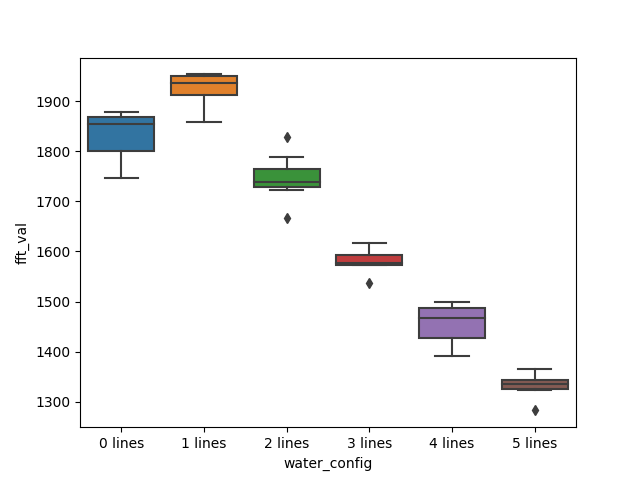

In [5]:
_ = matplotlib.pyplot.figure()

seaborn.boxplot(data=res_df, x='water_config', y='fft_val')

print("0-1 : ", scipy.stats.ranksums(res_df[res_df.water_config_id == 0].fft_val, res_df[res_df.water_config_id == 1].fft_val))
print("1-2 : ", scipy.stats.ranksums(res_df[res_df.water_config_id == 1].fft_val, res_df[res_df.water_config_id == 2].fft_val))
print("2-3 : ", scipy.stats.ranksums(res_df[res_df.water_config_id == 2].fft_val, res_df[res_df.water_config_id == 3].fft_val))
print("3-4 : ", scipy.stats.ranksums(res_df[res_df.water_config_id == 3].fft_val, res_df[res_df.water_config_id == 4].fft_val))
print("4-5 : ", scipy.stats.ranksums(res_df[res_df.water_config_id == 4].fft_val, res_df[res_df.water_config_id == 5].fft_val))
print("")
print("0-2 : ", scipy.stats.ranksums(res_df[res_df.water_config_id == 0].fft_val, res_df[res_df.water_config_id == 2].fft_val))
print("1-3 : ", scipy.stats.ranksums(res_df[res_df.water_config_id == 1].fft_val, res_df[res_df.water_config_id == 3].fft_val))
print("2-4 : ", scipy.stats.ranksums(res_df[res_df.water_config_id == 2].fft_val, res_df[res_df.water_config_id == 4].fft_val))
print("3-5 : ", scipy.stats.ranksums(res_df[res_df.water_config_id == 3].fft_val, res_df[res_df.water_config_id == 5].fft_val))
print("")
print("0-3 : ", scipy.stats.ranksums(res_df[res_df.water_config_id == 0].fft_val, res_df[res_df.water_config_id == 3].fft_val))
print("1-4 : ", scipy.stats.ranksums(res_df[res_df.water_config_id == 1].fft_val, res_df[res_df.water_config_id == 4].fft_val))
print("2-5 : ", scipy.stats.ranksums(res_df[res_df.water_config_id == 2].fft_val, res_df[res_df.water_config_id == 5].fft_val))
print("")
print("0-4 : ", scipy.stats.ranksums(res_df[res_df.water_config_id == 0].fft_val, res_df[res_df.water_config_id == 4].fft_val))
print("1-5 : ", scipy.stats.ranksums(res_df[res_df.water_config_id == 1].fft_val, res_df[res_df.water_config_id == 5].fft_val))
print("")
print("0-5 : ", scipy.stats.ranksums(res_df[res_df.water_config_id == 0].fft_val, res_df[res_df.water_config_id == 5].fft_val))


acc_s6_a4_r1_f500_w0.txt


ValueError: zero-size array to reduction operation minimum which has no identity

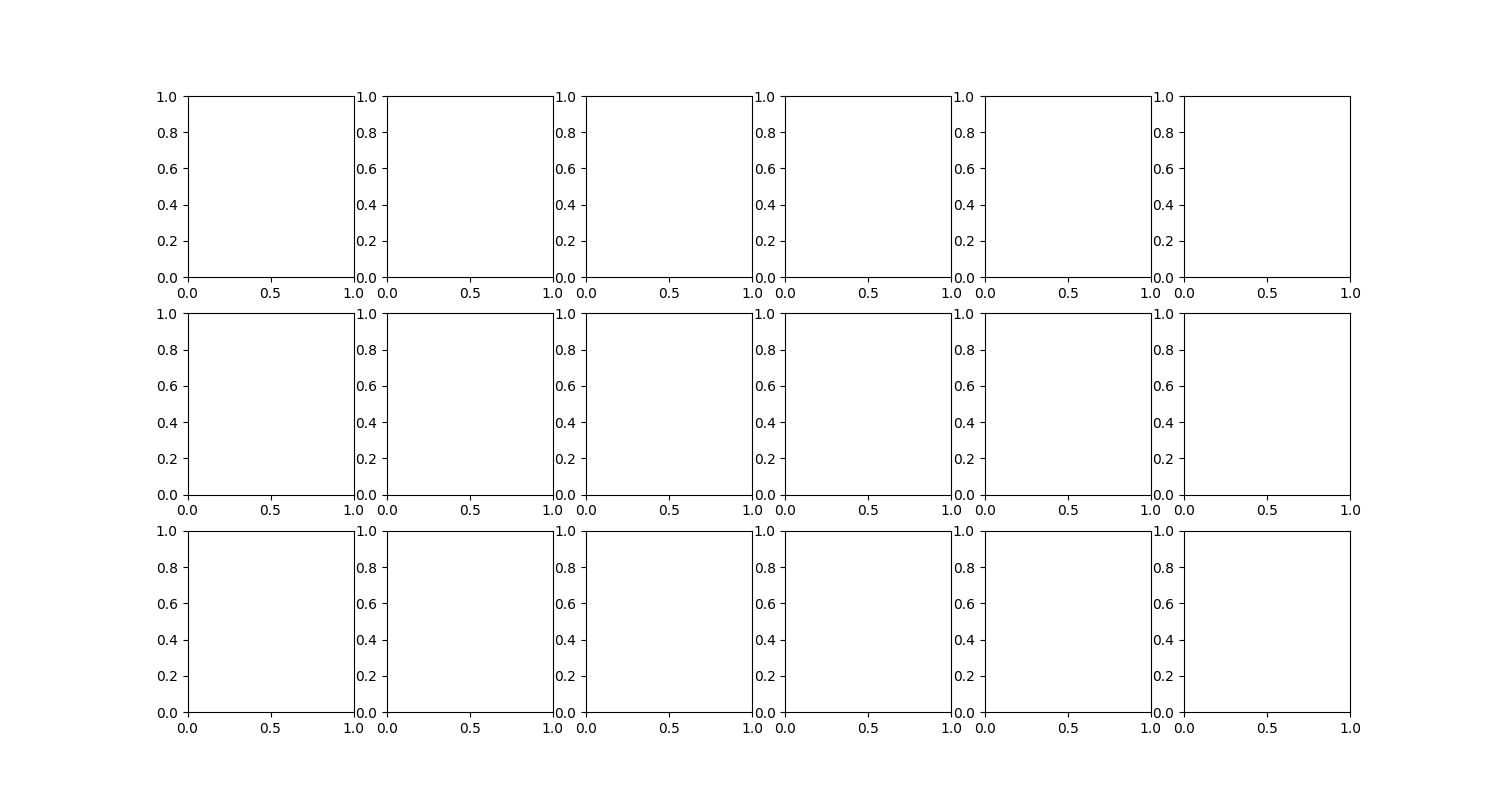

In [6]:
ACT_ACC_PAIRING_TOP         = {0:1, 1:2, 2:3, 3:4, 4:6, 5:8, 6:9, 7:9}

fig, ax = matplotlib.pyplot.subplots(3, 6, figsize=(15,8))
set_id = 0
for exp_i, exp in data.iterrows():
    
    if exp_i < set_id:
        continue

    if exp_i > set_id+5:
        continue
    
    if exp['frequency'] != 500:
        continue
    print(exp.filename)
    acc = 2
    wc_id = exp_i-set_id

    tims = numpy.array(exp['data'][acc]['Z']['t'])/1000
    tims = tims - numpy.min(tims)
    vals = exp['data'][acc]['Z']['val']-numpy.mean(exp['data'][acc]['Z']['val'])
    ax[0,wc_id].plot(tims, vals)
    ax[0,wc_id].set_ylim([-1.2, 1.2])

    tims = numpy.array(exp['data'][acc]['Z']['t'])/1000
    tims = tims[:1600] - numpy.min(tims[:1600])
    vals = exp['data'][acc]['Z']['val'][:1600]-numpy.mean(exp['data'][acc]['Z']['val'][:1600])
    ax[1,wc_id].plot(tims, vals)
    ax[1,wc_id].set_ylim([-1.2, 1.2])

    sig_fft = exp['data'][acc]['Z']['val']
    sig_fft = numpy.fft.fft(sig_fft-numpy.mean(sig_fft))
    fre_fft = numpy.fft.fftfreq(sig_fft.shape[0], 1/1600)[:int(sig_fft.shape[0]/2)]
    sig_fft = numpy.abs(sig_fft[:int(sig_fft.shape[0]/2)])
    TOLERANCE_FREQ = 50
    min_index = numpy.argwhere(fre_fft > res_dp['frequency']-TOLERANCE_FREQ)[0][0]
    max_index = numpy.argwhere(fre_fft < res_dp['frequency']+TOLERANCE_FREQ)[-1][0]
    ax[2,wc_id].plot(fre_fft, sig_fft)
    ax[2,wc_id].vlines([fre_fft[min_index], fre_fft[max_index]], 0, numpy.max(sig_fft), 'k')
    # ax[2,wc_id].set_ylim([0, 4500])

In [ ]:
res_df

,acc,actuator,frequency,replicate,water_config_id,water_config,fft_val
0,2,1,500,1,0,0 lines,906.563608
1,2,1,500,1,1,1 lines,800.155215
2,2,1,500,1,2,2 lines,782.250660
3,2,1,500,1,3,3 lines,691.570920
4,2,1,500,1,4,4 lines,645.351690
5,2,1,500,1,5,5 lines,611.927994
6,2,1,500,2,0,0 lines,892.093189
7,2,1,500,2,1,1 lines,780.054572
8,2,1,500,2,2,2 lines,741.813661
9,2,1,500,2,3,3 lines,741.509522
